<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/banner_dl2.png">


# ✋ MediaPipe Hands

**MediaPipe Hands** es un modelo de **detección y seguimiento de manos en tiempo real**. Utiliza una combinación de redes neuronales para identificar **21 puntos clave** en cada mano y proporciona una representación estructural útil para diversas aplicaciones.  


## ¿Cómo funciona MediaPipe Hands?  
El modelo opera en dos fases principales:  

**Detección de la mano** → Encuentra la posición de la mano en la imagen.  
**Estimación de los puntos clave** → Predice la ubicación de los **21 landmarks** en la mano detectada.  

MediaPipe Hands puede detectar **una o ambas manos** y permite realizar gestos, seguimiento de movimientos y control por gestos en aplicaciones interactivas.  



##  Puntos clave de la mano en MediaPipe Hands  
Cada mano detectada tiene **21 puntos clave** numerados de la siguiente manera:  

**Puntos principales**  
- **0** → Muñeca  
- **1-4** → Pulgar  
- **5-8** → Índice  
- **9-12** → Medio  
- **13-16** → Anular  
- **17-20** → Meñique 



## Opciones de configuración 

#### STATIC_IMAGE_MODE (POR DEFECTO FALSE) 
Puede tener valores de True o False. Cuando se le asigna False, entonces trata a las imágeness de entrada como un videostream, de tal manera que aplica el modelo de detección de palma y el modelo hand landmarks en un principio, pero luego realiza tracking para obtener la nueva ubicación de la mano, basándose en los puntos de referencia. De este modo, solo se invocará nuevamente al detector de palmas cuando no se hayan identificado los 21 puntos. 

Cuando se le asigna True, entonces los detectores estarán aplicádose en cada imagen, por lo que es mejor usarla en caso de que se trate de imágenes que no tengan que ver entre sí. 

####  MAX_NUM_HANDS (POR DEFECTO 2) 
Número máximo de manos por detectar. 

####  MIN_DETECTION_CONFIDENCE (POR DEFECTO 0.5) 
Valor mínimo de confianza del modelo de detección de manos, para que la detección sea considerada como exitosa. Sus valores comprenden de 0 a 1. 

####  MIN_TRACKING_CONFIDENCE (POR DEFECTO 0.5) 
Valor mínimo de confianza del modelo de rastreo de los landmark, para que el rastreo de los 21 puntos sea considerado como exitoso. En caso de no serlo, se invocará al detector de manos en la siguiente imagen. 
Este es ignorado si static_image_mode está en True. 


* https://developers.google.com/mediapipe/solutions/vision/hand_landmarker
* https://mediapipe.readthedocs.io/en/latest/solutions/hands.html

<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/hand-landmarks.png">

In [2]:
#Librerías básicas de esta notebook
import matplotlib.pyplot as plt
import numpy as np
import cv2
import mediapipe as mp

I0000 00:00:1758562438.402918   25600 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1758562438.404343   25734 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 25.0.7-0ubuntu0.24.04.2), renderer: Mesa Intel(R) UHD Graphics (CML GT2)
W0000 00:00:1758562438.428015   25724 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1758562438.437509   25731 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Handedness: [classification {
  index: 0
  score: 0.971796393
  label: "Left"
}
]


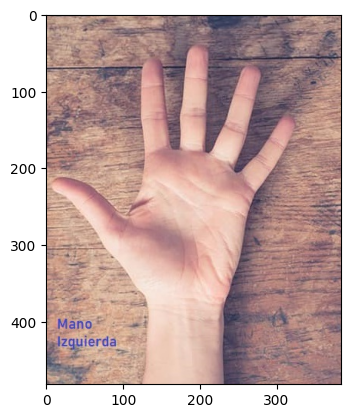

In [7]:
drawing = mp.solutions.drawing_utils
hands = mp.solutions.hands

with hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5) as hands:
    image = cv2.imread('figuras/mano_izquierda.jpg')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    results = hands.process(cv2.flip(image, 1))
    print('Handedness:', results.multi_handedness)   
    plt.imshow(image)
    plt.show()

Handedness: [classification {
  index: 1
  score: 0.948650599
  label: "Right"
}
]


I0000 00:00:1758562641.851412   25600 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1758562641.853444   25878 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 25.0.7-0ubuntu0.24.04.2), renderer: Mesa Intel(R) UHD Graphics (CML GT2)
W0000 00:00:1758562641.863718   25868 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1758562641.877377   25870 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


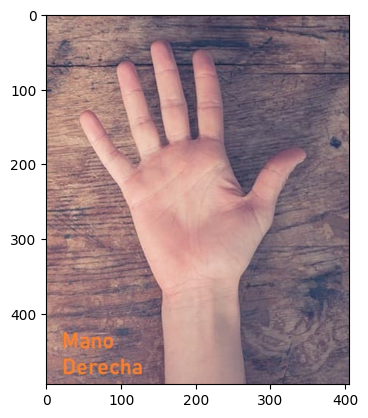

In [8]:
drawing = mp.solutions.drawing_utils
hands = mp.solutions.hands

with hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5) as hands:
    image = cv2.imread('figuras/mano_derecha.jpg')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    results = hands.process(cv2.flip(image, 1))
    print('Handedness:', results.multi_handedness)   
    plt.imshow(image)
    plt.show()

In [9]:
drawing = mp.solutions.drawing_utils
hands = mp.solutions.hands

with hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5) as hands:
    image = cv2.imread('figuras/mano_derecha.jpg')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(cv2.flip(image, 1))

print('Hand landmarks', results.multi_hand_landmarks)

Hand landmarks [landmark {
  x: 0.496645868
  y: 0.709997058
  z: 7.91663297e-07
}
landmark {
  x: 0.368302584
  y: 0.639390588
  z: -0.0536623225
}
landmark {
  x: 0.297142178
  y: 0.526951075
  z: -0.0771638304
}
landmark {
  x: 0.254678965
  y: 0.435357153
  z: -0.0972240493
}
landmark {
  x: 0.185246408
  y: 0.385299
  z: -0.117706031
}
landmark {
  x: 0.46021378
  y: 0.383369744
  z: -0.0307014268
}
landmark {
  x: 0.464049488
  y: 0.261963367
  z: -0.0638538301
}
landmark {
  x: 0.473583341
  y: 0.186015308
  z: -0.0974190831
}
landmark {
  x: 0.487245321
  y: 0.123038352
  z: -0.125378132
}
landmark {
  x: 0.554046631
  y: 0.38664785
  z: -0.0383654423
}
landmark {
  x: 0.583386
  y: 0.252583802
  z: -0.0674442798
}
landmark {
  x: 0.606763363
  y: 0.166519314
  z: -0.101143666
}
landmark {
  x: 0.625928164
  y: 0.0958346725
  z: -0.128004521
}
landmark {
  x: 0.631493092
  y: 0.418902695
  z: -0.0551723279
}
landmark {
  x: 0.684126198
  y: 0.29748112
  z: -0.0959702805
}
landm

I0000 00:00:1758562808.357062   25600 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1758562808.358769   26075 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 25.0.7-0ubuntu0.24.04.2), renderer: Mesa Intel(R) UHD Graphics (CML GT2)
W0000 00:00:1758562808.380781   26067 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1758562808.389793   26071 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


I0000 00:00:1758563257.426766   25600 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1758563257.428424   27907 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 25.0.7-0ubuntu0.24.04.2), renderer: Mesa Intel(R) UHD Graphics (CML GT2)
W0000 00:00:1758563257.439653   27898 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1758563257.450264   27900 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


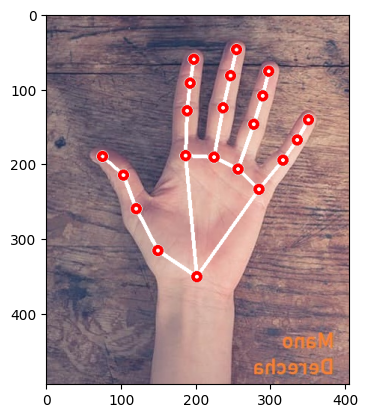

In [16]:
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands


# For static images:
with mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5) as hands:
    file='figuras/mano_derecha.jpg'
    image = cv2.flip(cv2.imread(file), 1)
    image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image)

    #print('Handedness:', results.multi_handedness)
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            drawing.draw_landmarks(
                image,
                hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                mp_drawing. DrawingSpec ( color= ( 255 , 0 , 0 ) , thickness= 3 , circle_radius= 5 ) ,
                mp_drawing. DrawingSpec ( color= ( 255 , 255 , 255 ) , thickness= 4))
            #print( hand_landmarks.landmark[6].y)
            #print( hand_landmarks.landmark[7].y)
            #print( hand_landmarks.landmark[8].y)

plt.imshow(image)
plt.show()